In [69]:
print("bin tree")

bin tree


In [70]:
from utils import draw_tree

In [71]:
# The building block of our tree data structure
# Like a node in a linked list, each TreeNode is a container for
# a value and references to up to two other TreeNodes (left and right)
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

In [72]:
from collections import deque


class BinaryTree:
    # create a new BinaryTree; it must have a root node
    def __init__(self, root_value):
        self.root = TreeNode(root_value)

    # Attach a new node left to a given one
    # current node can be the root, or any other node in the tree
    def insert_left(self, current_node, value):
        new_node = TreeNode(value)
        # When left is empty, attach it there
        if current_node.left is None:
            current_node.left = new_node
        else:
            # When there already is a left node,
            # attach the old left to the new node, and the new node to current (target)
            new_node.left = current_node.left
            current_node.left = new_node

    def insert_right(self, current_node, new_value):
        new_node = TreeNode(new_value)
        if current_node.right is None:
            current_node.right = new_node
        else:
            new_node.right = current_node.right
            current_node.right = new_node

    # --- Depth First Search (DFS) Methods ---
    # Concept: Explore deep into a branch before backtracking.
    # Time complexity: O(n) (We visit every node once)
    # Space complexity: O(h) (Where h is height of tree, due to recursion stack)

    # Pre-order: Root -> Left -> Right
    def pre_order_traversal(self, start_node, visit_list):
        if start_node is None:
            return
        # 1. Visit the Node (Process data)
        visit_list.append(start_node.value)
        # 2. Go to left subtree
        self.pre_order_traversal(start_node.left, visit_list)
        # 3. Go to right subtree
        self.pre_order_traversal(start_node.right, visit_list)

    # In-order: Left -> Root -> Right
    def in_order_traversal(self, start_node, visit_list):
        if start_node is None:
            return
        # 1. Go to left subtree
        self.in_order_traversal(start_node.left, visit_list)
        # 2. Visit the Node (Process data)
        visit_list.append(start_node.value)
        # 3. Go to right subtree
        self.in_order_traversal(start_node.right, visit_list)

    # Post-order: Left -> Right -> Root
    def post_order_traversal(self, start_node, visit_list):
        if start_node is None:
            return
        # 1. Go to left subtree
        self.post_order_traversal(start_node.left, visit_list)
        # 2. Go to right subtree
        self.post_order_traversal(start_node.right, visit_list)
        # 3. Visit the Node (Process data)
        visit_list.append(start_node.value)

    # --- Breadth First Search (BFS) Method ---
    # Concept: Explore neighbor nodes level by level.
    # Time complexity: O(n) (We visit every node once)
    # Space complexity: O(w) (Where w is the maximum width of the tree)
    # Why O(w)? In the worst case, the queue stores all nodes of the widest level.

    def breadth_first_traversal(self, start_node, visit_list):
        if start_node is None:
            return

        # We use a Queue for BFS to maintain FIFO (First In, First Out) order
        queue = deque()
        queue.append(start_node)

        while queue:
            # Remove the first node added to the queue
            visited = queue.popleft()

            # Visit/Process the node
            visit_list.append(visited.value)

            # Add children to the back of the queue to be processed later
            if visited.left is not None:
                queue.append(visited.left)
            if visited.right is not None:
                queue.append(visited.right)

In [73]:
# bt = BinaryTree(1)
# print(bt.root.right)
# bt.insert_left(bt.root, 2)
# print(bt.root.left.value)
# bt.insert_left(bt.root, 3)
# print(bt.root.left.value)
# bt.insert_left(bt.root, 4)

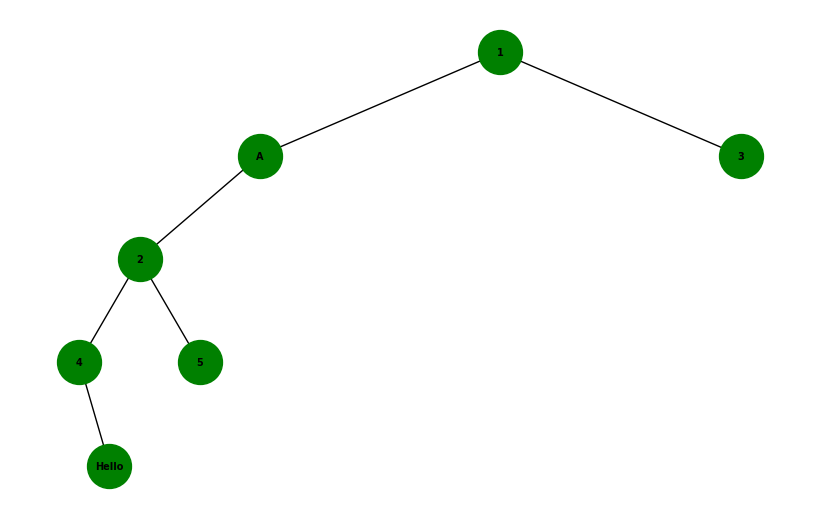

In [74]:
bt = BinaryTree(1)
bt.insert_left(bt.root, 2)
bt.insert_right(bt.root, 3)
bt.insert_left(bt.root.left, 4)
bt.insert_right(bt.root.left, 5)
bt.insert_left(bt.root, "A")

node_four = bt.root.left.left.left
bt.insert_right(node_four, "Hello")

draw_tree(bt)

PRE-ORDER:  ['me', 'Mom', 'Grandma', 'Grandpa', 'Dad', 'Granny', 'Grandfather']
IN-ORDER:  ['Grandma', 'Mom', 'Grandpa', 'me', 'Granny', 'Dad', 'Grandfather']
POST-ORDER:  ['Grandma', 'Grandpa', 'Mom', 'Granny', 'Grandfather', 'Dad', 'me']
BFS:  ['me', 'Mom', 'Dad', 'Grandma', 'Grandpa', 'Granny', 'Grandfather']


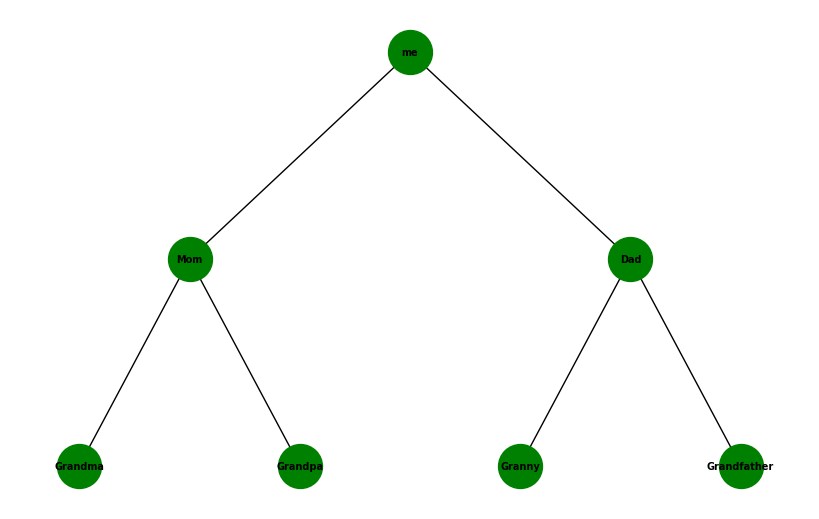

In [75]:
ancestry_tree = BinaryTree("me")
me = ancestry_tree.root

ancestry_tree.insert_left(me, "Mom")
ancestry_tree.insert_right(me, "Dad")

mom = ancestry_tree.root.left
dad = me.right

ancestry_tree.insert_left(mom, "Grandma")
ancestry_tree.insert_right(mom, "Grandpa")

ancestry_tree.insert_left(dad, "Granny")
ancestry_tree.insert_right(dad, "Grandfather")

visit_list = []
start_node = me

ancestry_tree.pre_order_traversal(start_node, visit_list)
print("PRE-ORDER: ", visit_list)

visit_list = []
start_node = me
ancestry_tree.in_order_traversal(start_node, visit_list)
print("IN-ORDER: ", visit_list)

visit_list = []
start_node = me
ancestry_tree.post_order_traversal(start_node, visit_list)
print("POST-ORDER: ", visit_list)

visit_list = []
start_node = me
ancestry_tree.breadth_first_traversal(start_node, visit_list)
print("BFS: ", visit_list)

draw_tree(ancestry_tree)

PRE-ORDER:  [1, 2, 4, 5, 3, 6, 7]
IN-ORDER:  [4, 2, 5, 1, 6, 3, 7]


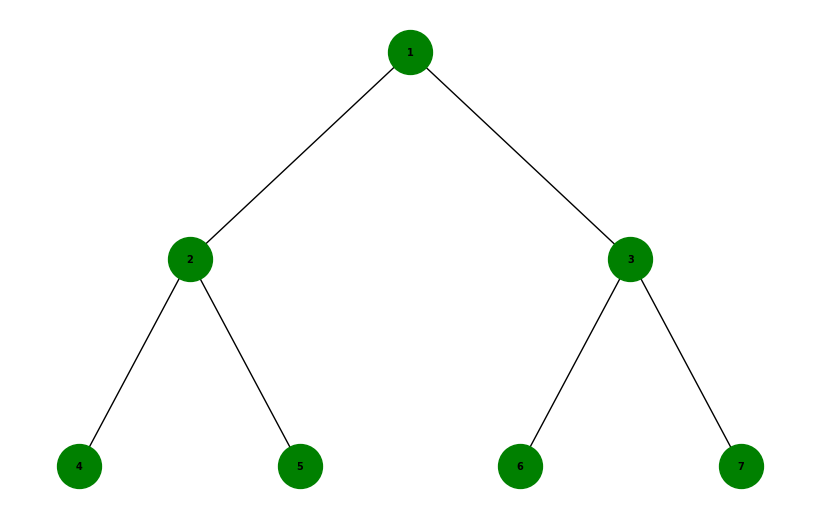

In [76]:
easy_tree = BinaryTree(1)

easy_tree.insert_left(easy_tree.root, 2)
easy_tree.insert_right(easy_tree.root, 3)
easy_tree.insert_left(easy_tree.root.left, 4)
easy_tree.insert_right(easy_tree.root.left, 5)
easy_tree.insert_left(easy_tree.root.right, 6)
easy_tree.insert_right(easy_tree.root.right, 7)

visit_list = []
start_node = easy_tree.root

easy_tree.pre_order_traversal(start_node, visit_list)
print("PRE-ORDER: ", visit_list)

visit_list2 = []
start_node = easy_tree.root
easy_tree.in_order_traversal(start_node, visit_list2)
print("IN-ORDER: ", visit_list2)

draw_tree(easy_tree)